# Imports

In [1]:
import numpy as np
import json
import os
import math
import matplotlib.pyplot as plt
import time
import copy
from copy import deepcopy
import operator
import pickle
from tqdm import tqdm
from math import isnan
import pandas as pd

from data_viz import *
from KMeans import *
from clustering_and_reconstruction import *
from Second_method import *
from First_method import *
from utils import *

# Path definition

In [2]:
dir_joints = 'Joints_semidef'
dir_im = 'Immagini_semidef'

save_path = os.path.join(os.getcwd(), 'best_worst_cases')
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Compare poses

### Loading poses

In [3]:
start = time.time()

dict_joints, dict_joints_SR_destrorso = load_poses(dir_im, dir_joints)

end = time.time()
print(end-start)
print(len(dict_joints))

100%|██████████| 618/618 [00:00<00:00, 2274.63it/s]


0.28565287590026855
618


### Visualization pose+statue

297scala_rendered.png


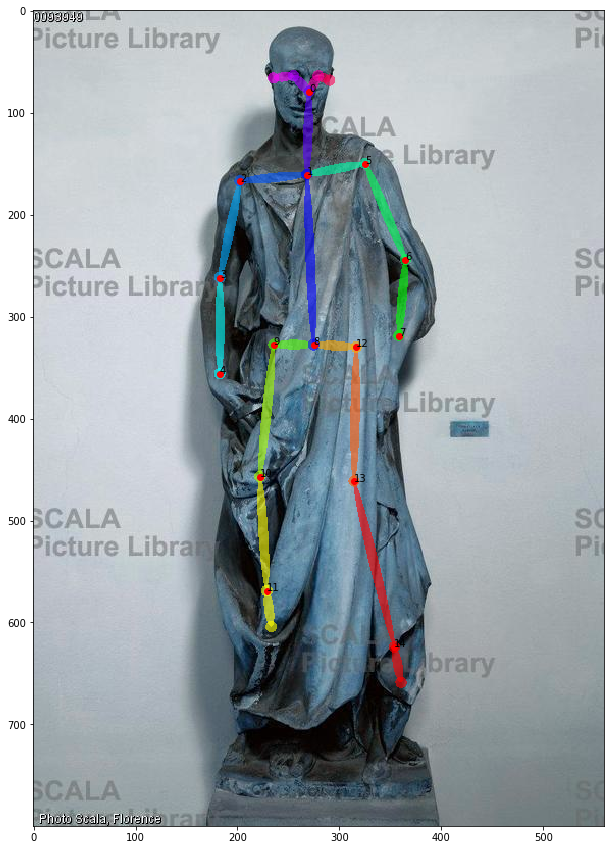

In [4]:
i = 234 #insert a number of a sample

show_pose(i, dict_joints, dir_im)

### Generation of comparison results

#### First method

In [ ]:
start = time.time()

best_worst_cases_1 = first_method_app(dict_joints_SR_destrorso, mirroring = False, turning = False)
 
end = time.time()
print(end-start)

#### Second method

In [ ]:
start = time.time()

best_worst_cases_2 = second_method_app(dict_joints_SR_destrorso)
 
end = time.time()
print(end-start)

### Writing results on txt

In [7]:
with open(os.path.join(save_path, 'best_worst_cases_1.txt'), 'wb') as fp:
   pickle.dump(best_worst_cases_1, fp)

with open(os.path.join(save_path, 'best_worst_cases_2.txt'), 'wb') as fp:
    pickle.dump(best_worst_cases_2, fp)

### Uploading results from txt

#### First method

In [ ]:
best_worst_cases_1 = {}
with open (os.path.join(save_path, 'best_worst_cases_1.txt'), 'rb') as fp:
  best_worst_cases_1 = pickle.load(fp)

#### Second method

In [5]:
best_worst_cases_2 = {}
with open (os.path.join(save_path, 'best_worst_cases_2.txt'), 'rb') as fp:
  best_worst_cases_2 = pickle.load(fp)

### Showing results

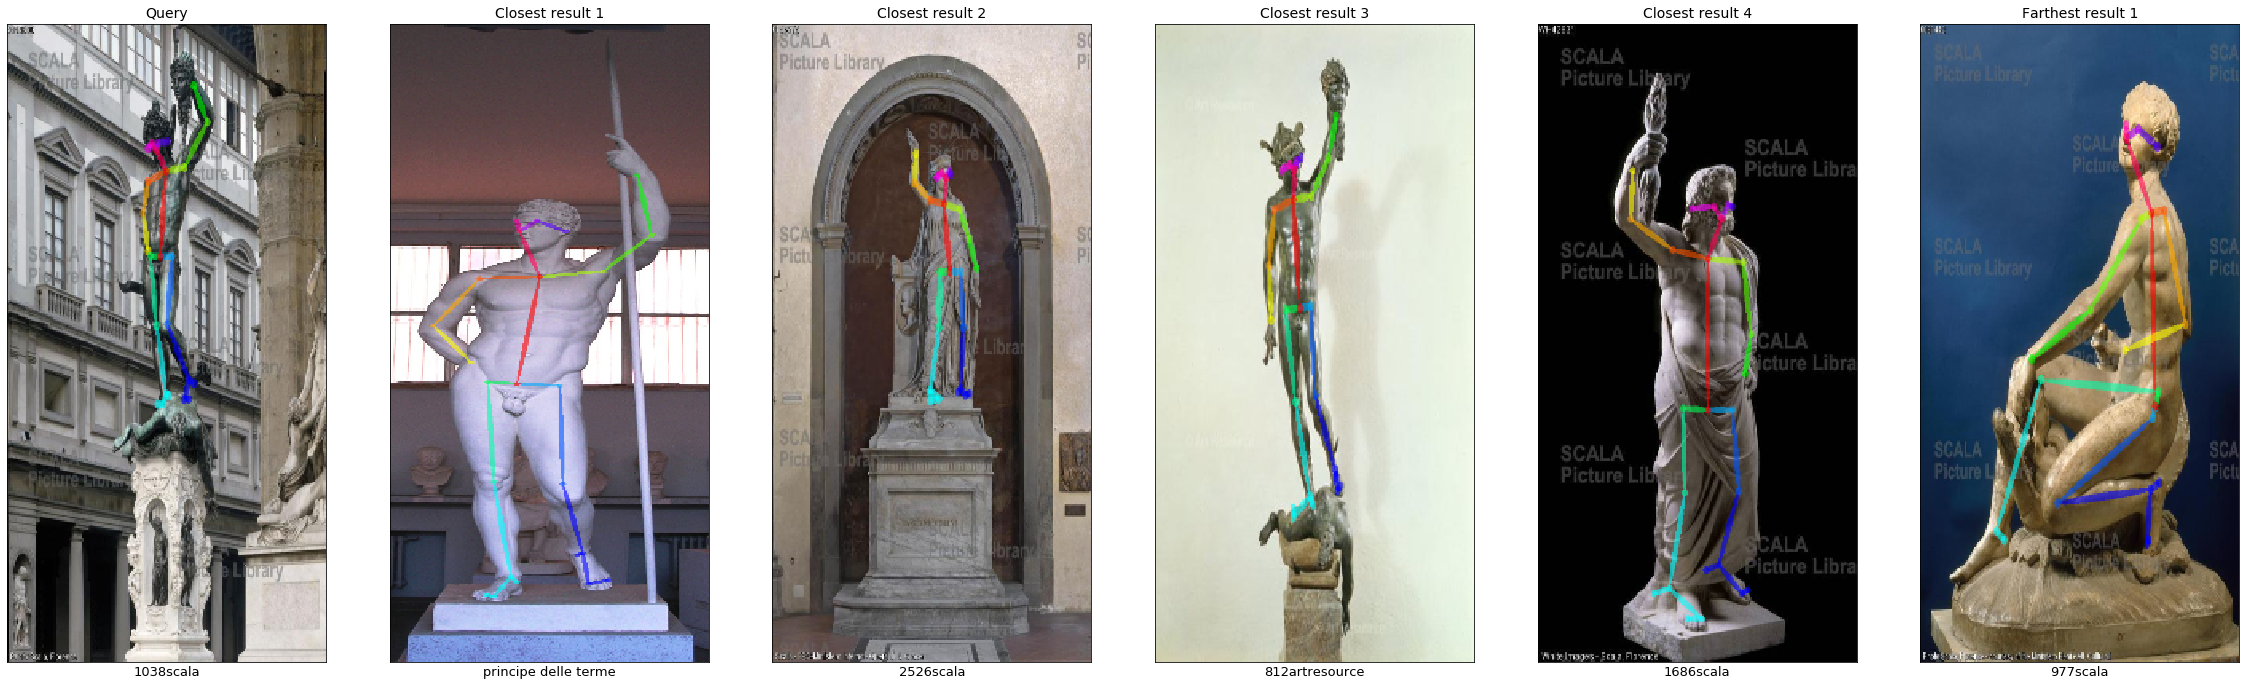

Query:  1038scala 

---------------

Closest results: 

principe delle terme 

2526scala 

812artresource 

1686scala 

---------------

Farthest result:  977scala


In [7]:
plot_images(dir_im, 9, best_worst_cases_1) #insert a number of a sample and the dict of the results of the selected method

### Saving images of results

In [ ]:
for j in tqdm(range(len(best_worst_cases_2))):
    try:
        save_images(dir_im, j, 1, best_worst_cases_2)
    except:
        pass

# Clustering

### Clustering

In [15]:
n_clusters = 9 #insert the number of desired clusters

In [ ]:
df_clustering, relevant_features_centroids, centroids = k_means(create_features(dict_joints_SR_destrorso)[0], 
                                                                create_features(dict_joints_SR_destrorso)[1], n_clusters)

### More clustering and pose reconstruction

In [5]:
n_cluster_list = [5,6] #insert the numbers of desired clusters

In [6]:
df_cls, rec_poses = clustering_several_n(n_cluster_list, dict_joints_SR_destrorso)

Clustering with 5 clusters: done
Clustering with 6 clusters: done


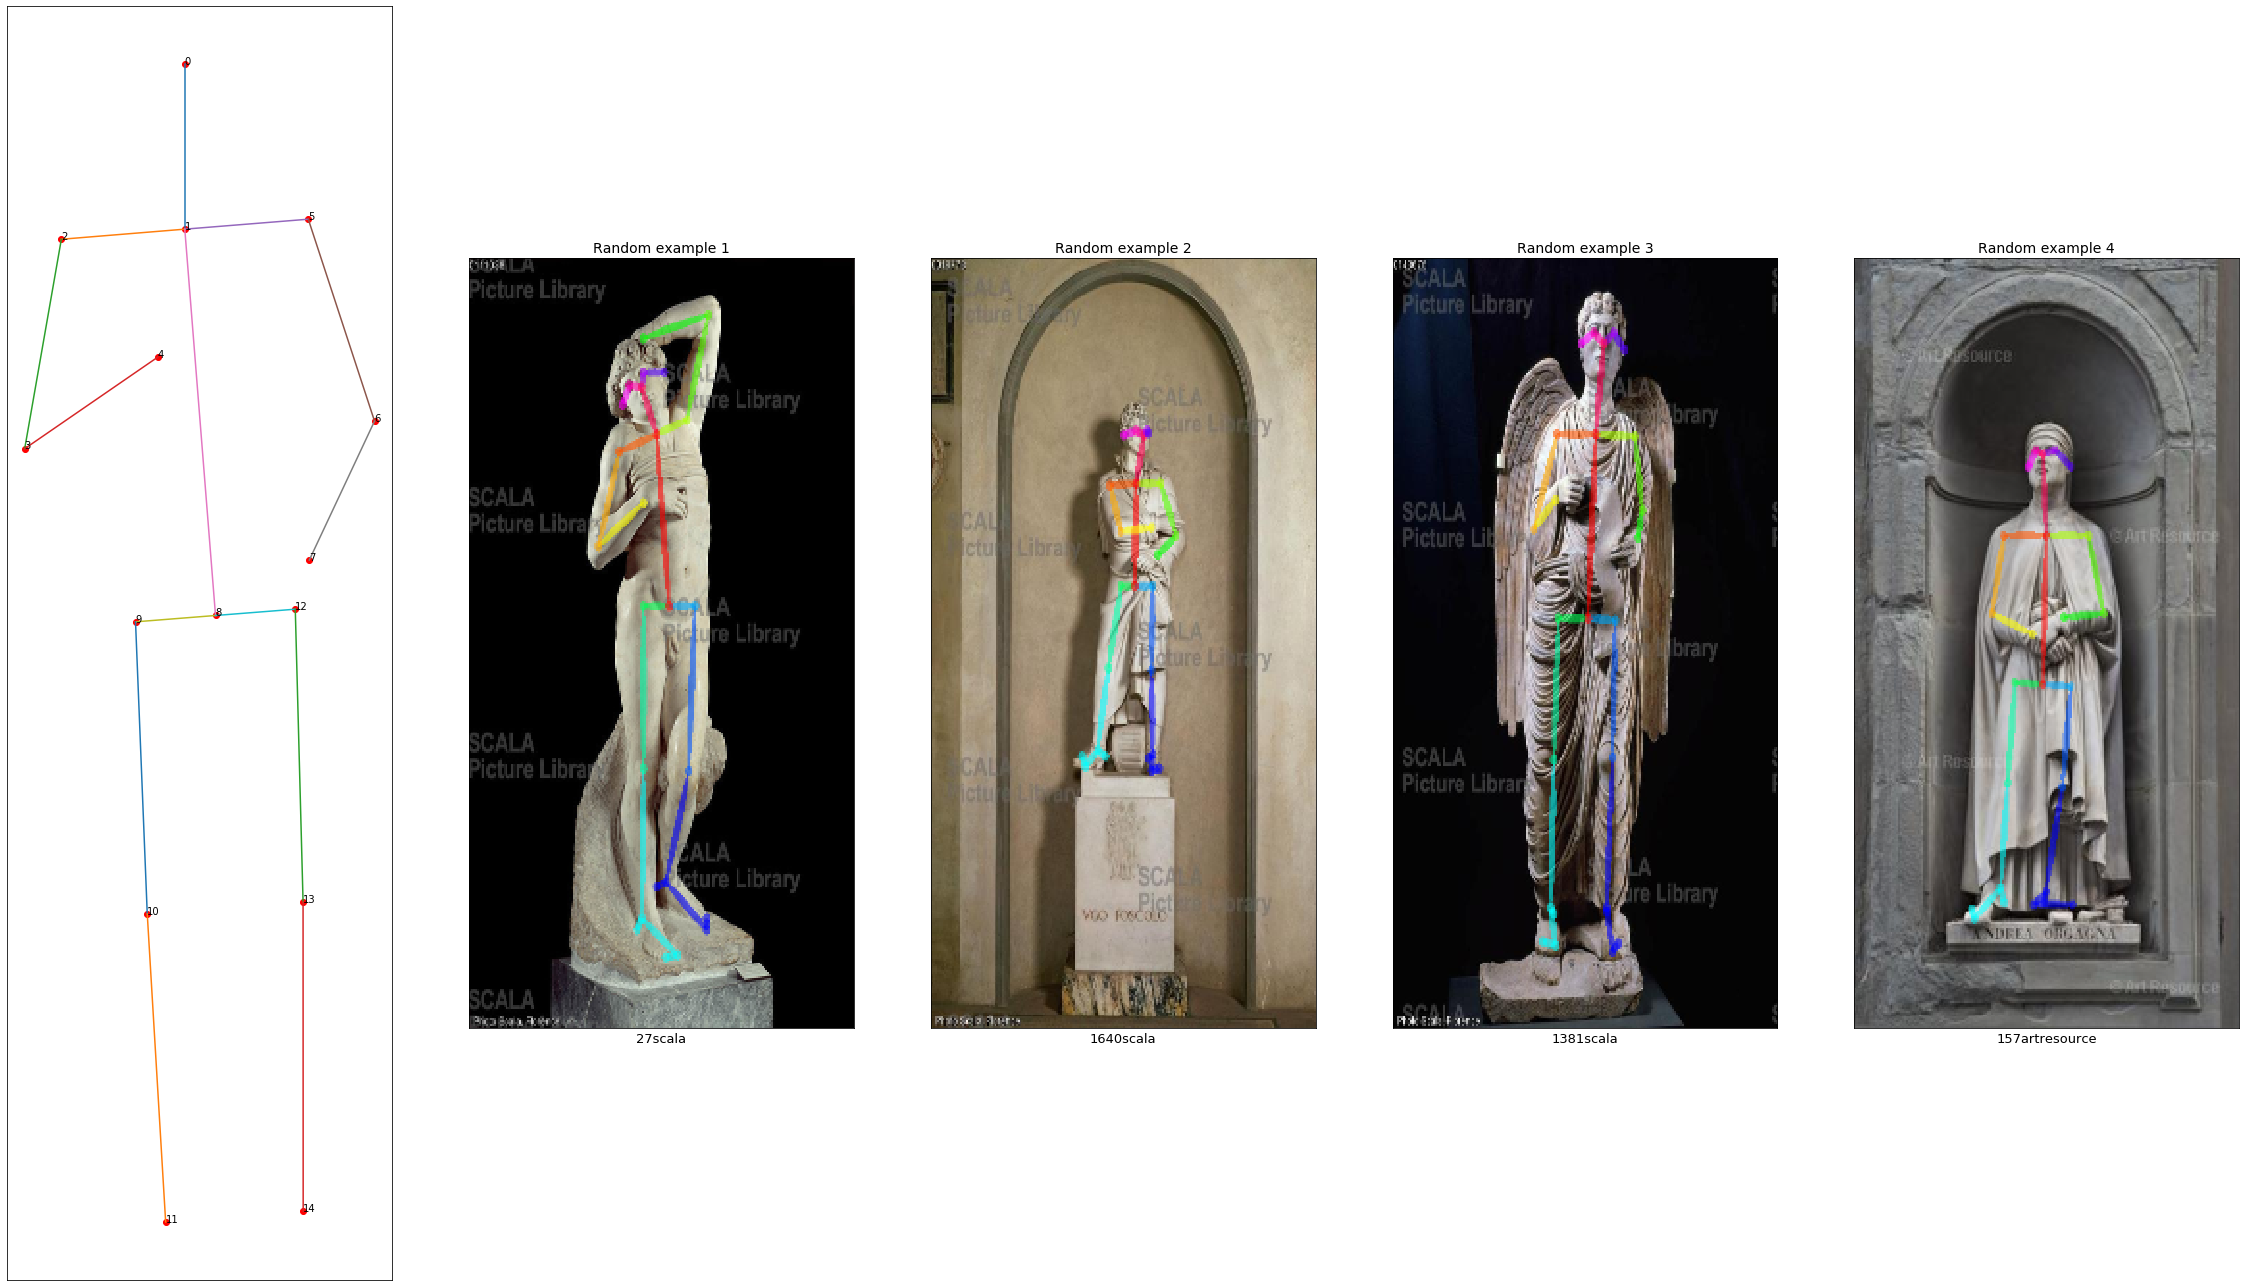

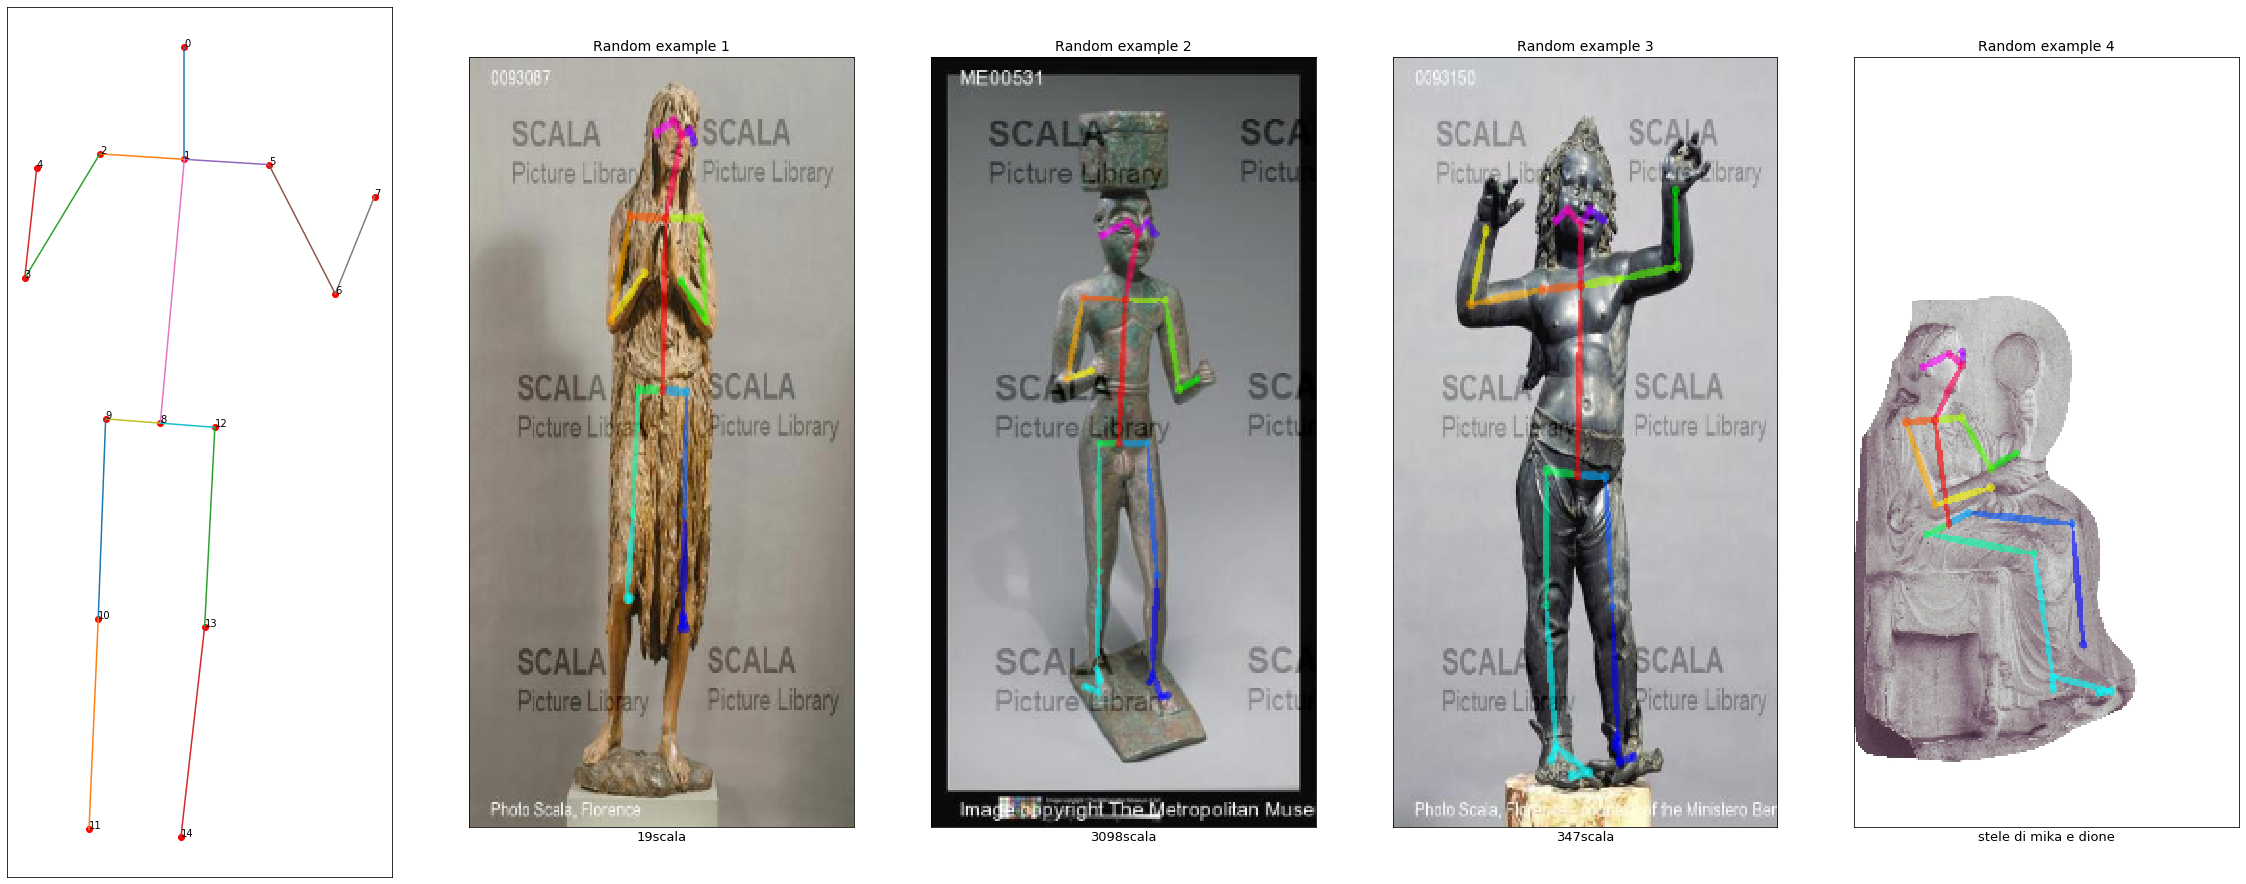

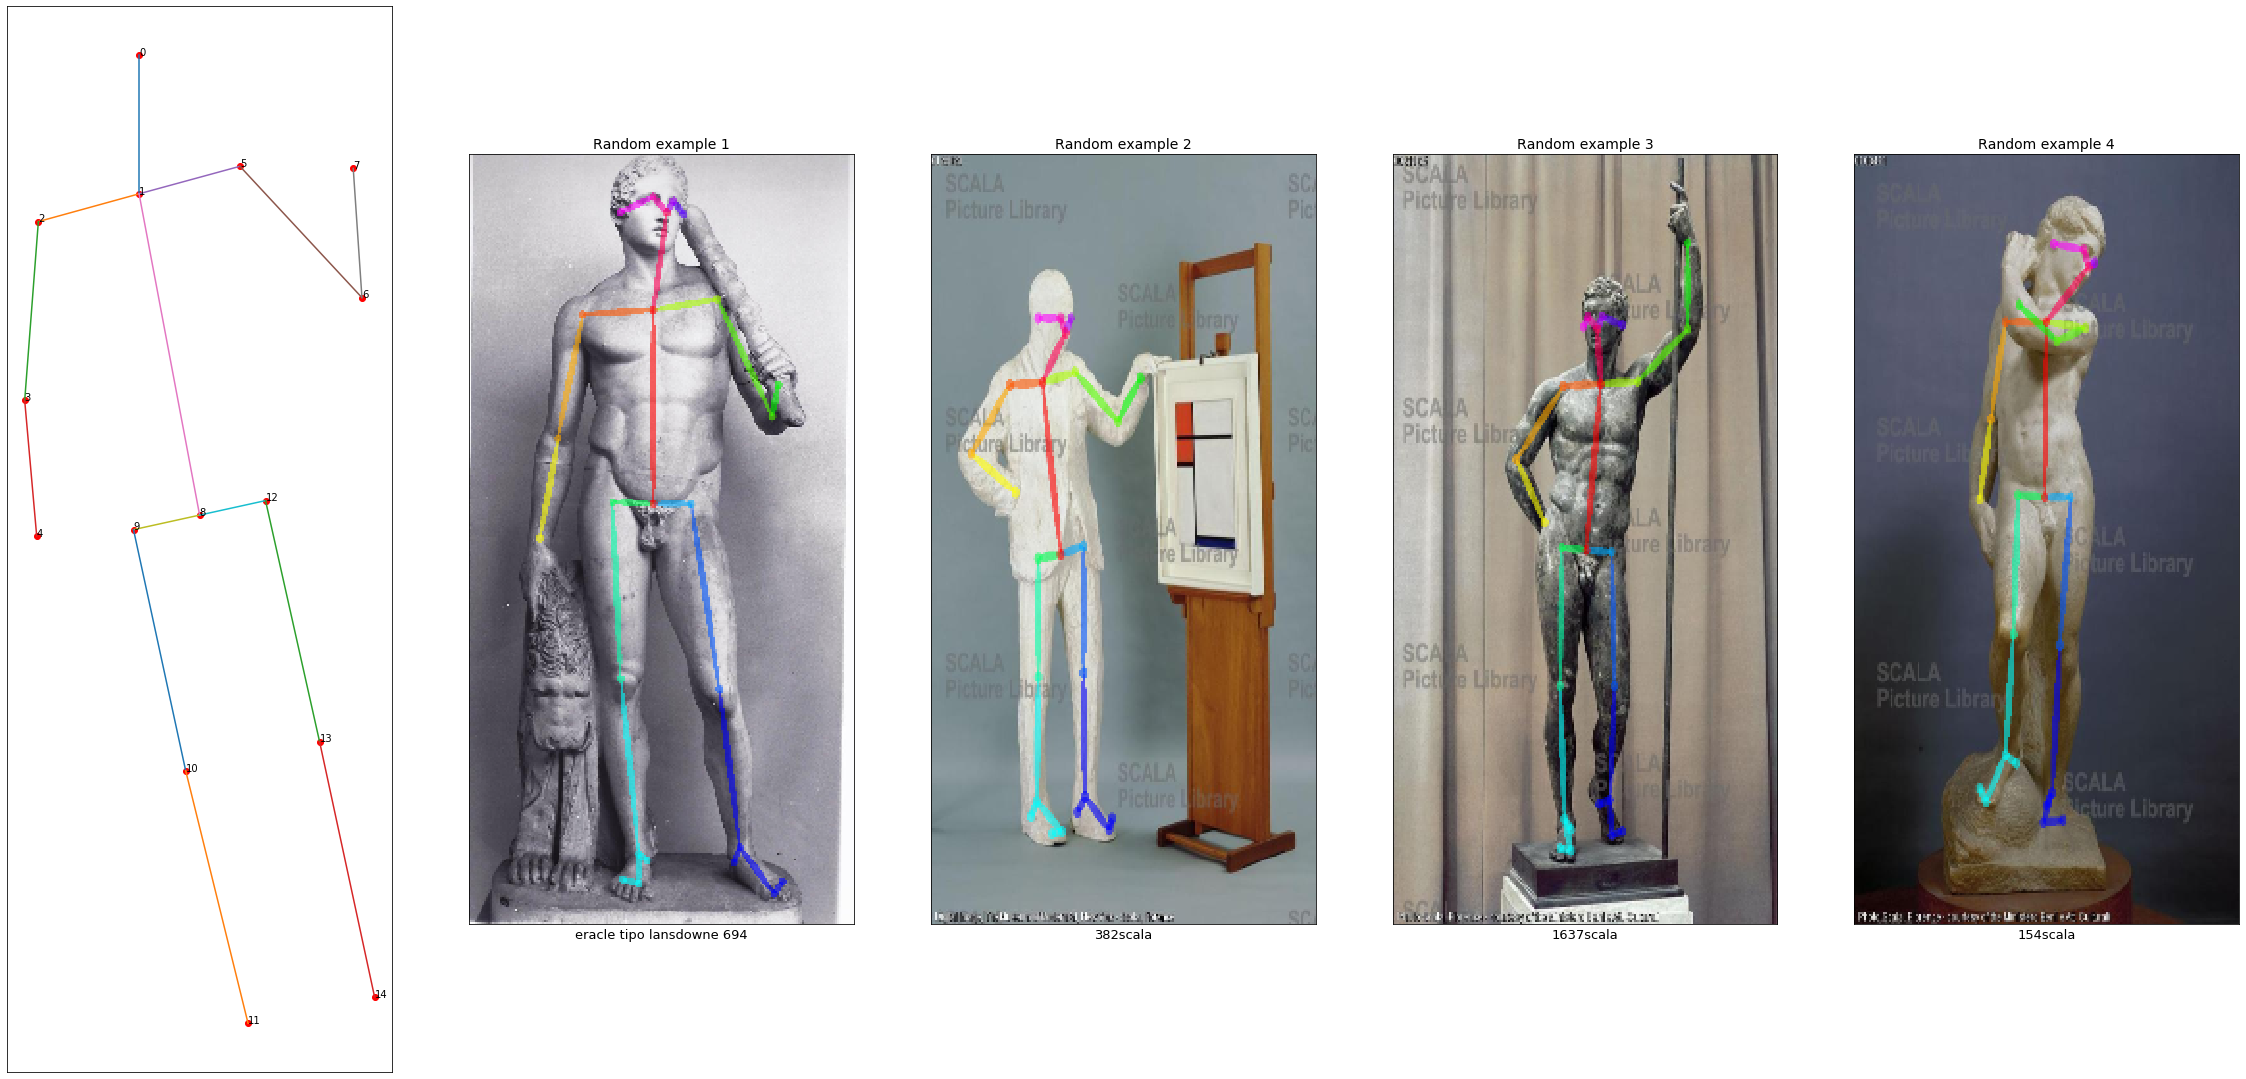

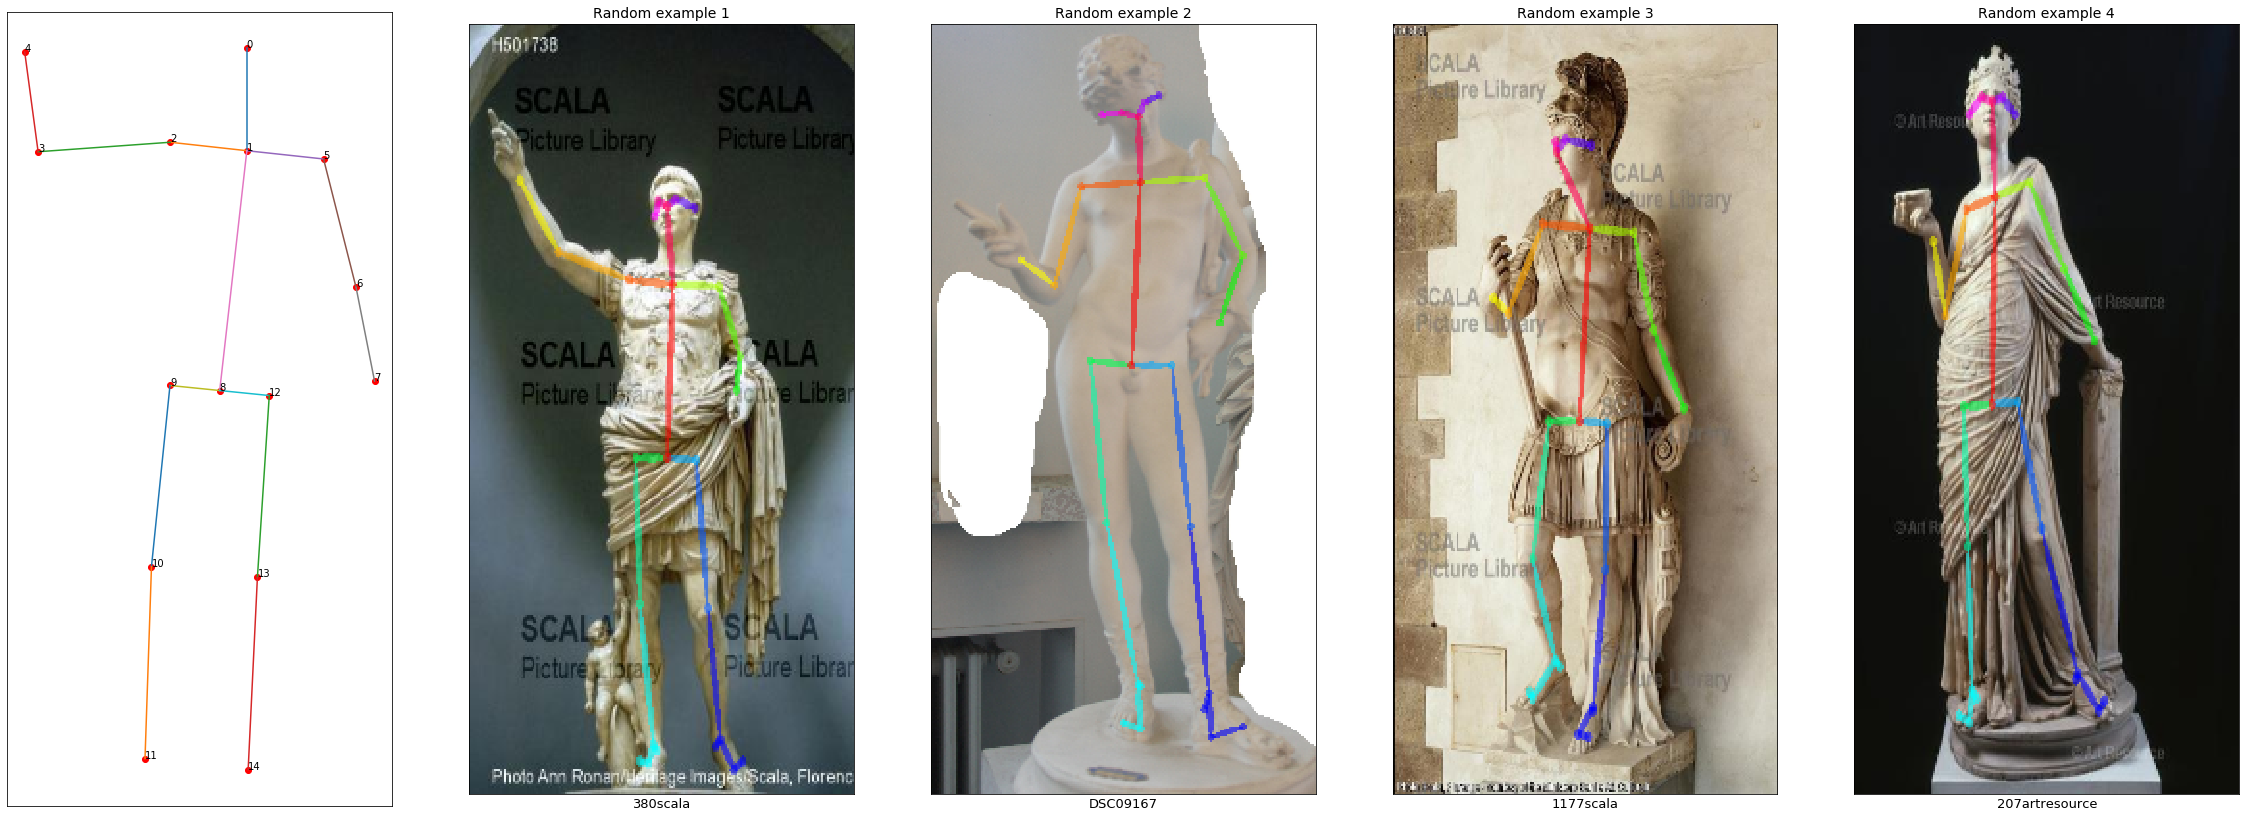

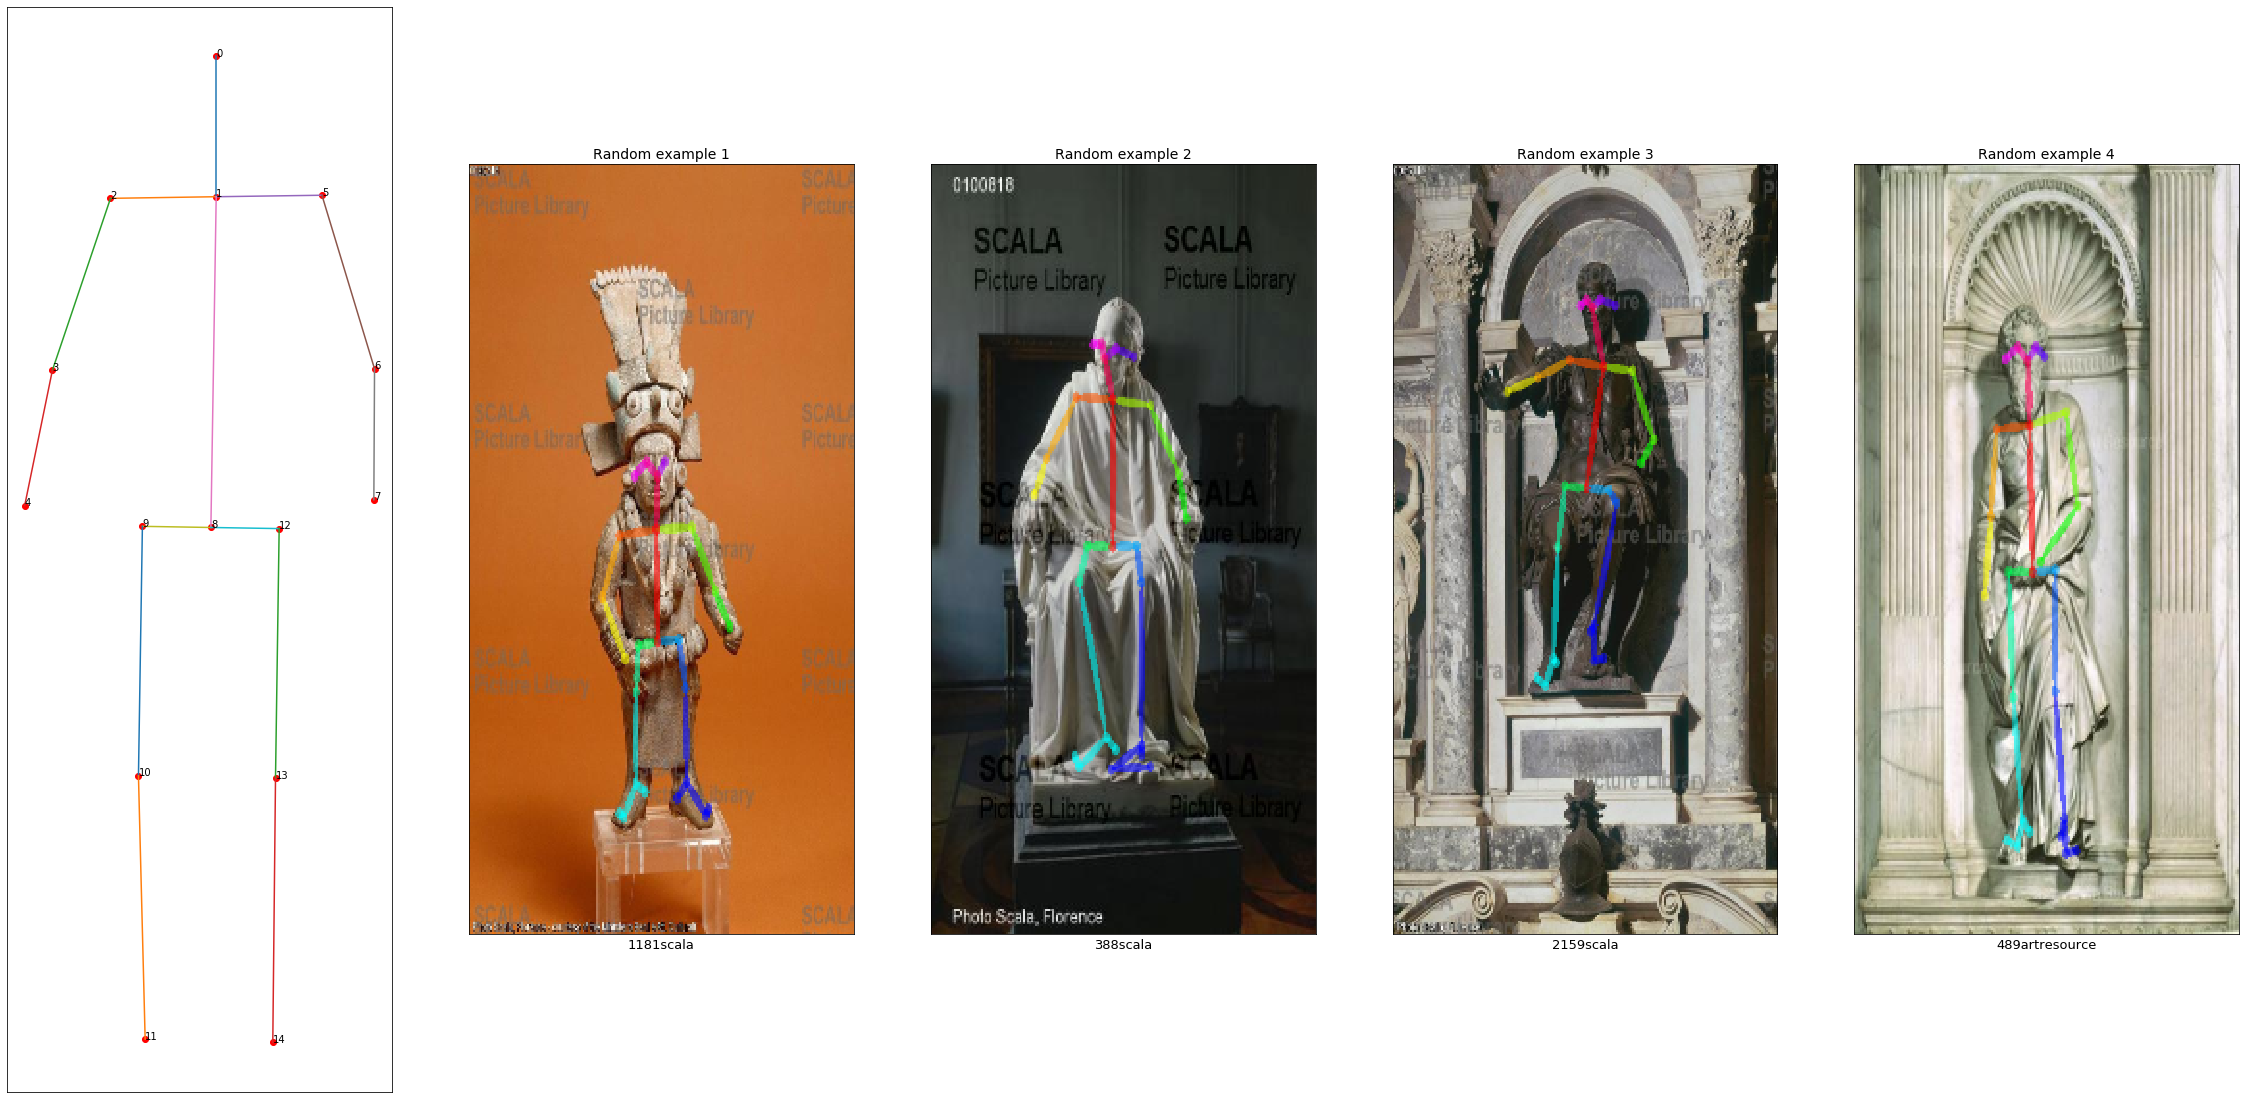

In [7]:
watch_samples(5,df_cls,rec_poses,n_cluster_list, dir_im)